In [1]:
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import numpy as np

from matplotlib import pyplot as plt
from matplotlib_venn import venn3

import statsmodels.api as sm

import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Read data

In [2]:
df = pd.read_parquet('/Users/julianeoliveira/Downloads/aesop_2025_09_30_mun_withMEM.parquet')

In [3]:
df.columns.to_list()

['co_ibge',
 'epiyear',
 'epiweek',
 'atend_totais',
 'atend_ivas',
 'atend_arbov',
 'atend_diarreicas',
 'atend_0a11',
 'year_week',
 'epidemi_cal_start',
 'epidemi_cal_end',
 'year_week_ts',
 'co_uf',
 'nm_uf',
 'co_ibge7',
 'nm_municipio',
 'sigla_uf',
 'co_reg_saude',
 'nm_reg_saude',
 'ra_atend_ivas',
 'ra_atend_ivas_ma',
 'gr_ra_atend_ivas_ma',
 'ma_atend_ivas_indicators',
 'ra_atend_arbov',
 'ra_atend_arbov_ma',
 'gr_ra_atend_arbov_ma',
 'ma_atend_arbov_indicators',
 'P_growth_otc_ivas',
 'P_growth_aps_ivas',
 'sinal_evi_ivas',
 'lim_esp_evi_ivas',
 'sinal_evi_arbov',
 'lim_esp_evi_arbov',
 'sinal_ears_ivas',
 'lim_esp_ears_ivas',
 'prob_gro_trend_ivas',
 'sinal_ears_arbov',
 'lim_esp_ears_arbov',
 'sinal_mmaing_ivas',
 'lim_esp_mmaing_ivas',
 'prob_gro_trend_arbov',
 'dqi',
 'perc_missing',
 'perc_completude',
 'diff_2w',
 'diff_3w',
 'sum_miss',
 'completude',
 'tempestividade',
 'sinal_mmaing_arbov',
 'lim_esp_mmaing_arbov',
 'exc_evi_ivas',
 'exc_evi_arbov',
 'exc_ears_ivas'

# Count data

In [3]:
data = df[['co_ibge','nm_municipio','epiyear','year_week','atend_ivas','Aviso AESOP', 'sinal_ens_ivas','mem_surge',
       'mem_surge_01','sinal_evi_ivas','sinal_ears_ivas','sinal_mmaing_ivas','mem_surge_01_without_isolated',
        'mem_surge_01_corect_with_consec',
       'warning_final_mem_surge_01']]

In [4]:
data = data[data.year_week >= '2022-42']

In [6]:
data.warning_final_mem_surge_01.sum()

18459

In [7]:
data.sinal_evi_ivas.sum()

133804.0

In [8]:
data.sinal_ears_ivas.sum()

97537.0

In [9]:
data.sinal_mmaing_ivas.sum()

35573.0

In [10]:
data.year_week.nunique()

153

In [11]:
data.year_week.max()

'2025-38'

In [12]:
data.year_week.min()

'2022-42'

In [13]:
data.co_ibge.nunique()

5563

In [14]:
n = data.year_week.nunique()*data.co_ibge.nunique()

data.year_week.nunique()*data.co_ibge.nunique()

851139

# Count warnings by model

In [15]:
data.head()

,co_ibge,nm_municipio,epiyear,year_week,atend_ivas,Aviso AESOP,sinal_ens_ivas,mem_surge,mem_surge_01,sinal_evi_ivas,sinal_ears_ivas,sinal_mmaing_ivas,mem_surge_01_without_isolated,mem_surge_01_corect_with_consec,warning_final_mem_surge_01
302,110001,Alta Floresta D'Oeste,2022,2022-42,31,0,0.0,0,0,0.0,NaN,NaN,0,0,0
303,110001,Alta Floresta D'Oeste,2022,2022-43,16,0,0.0,0,0,0.0,NaN,NaN,0,0,0
304,110001,Alta Floresta D'Oeste,2022,2022-44,20,0,0.0,0,0,0.0,NaN,NaN,0,0,0
305,110001,Alta Floresta D'Oeste,2022,2022-45,32,0,1.0,0,0,1.0,NaN,NaN,0,0,0
306,110001,Alta Floresta D'Oeste,2022,2022-46,47,0,0.0,0,0,0.0,NaN,NaN,0,0,0


In [16]:
print(data.sinal_evi_ivas.sum())
round(data.sinal_evi_ivas.sum()*100/n,1)

133804.0


15.7

In [17]:
print(data.sinal_ears_ivas.sum())
round(data.sinal_ears_ivas.sum()*100/n,1)

97537.0


11.5

In [18]:
print(data.sinal_mmaing_ivas.sum())

round(data.sinal_mmaing_ivas.sum()*100/n,1)

35573.0


4.2

In [19]:
data.groupby(['epiyear'])['sinal_mmaing_ivas'].sum()

epiyear
2022        0.0
2023     1667.0
2024    21863.0
2025    12043.0
Name: sinal_mmaing_ivas, dtype: float32

In [20]:
data.groupby(['epiyear'])['sinal_ears_ivas'].sum()

epiyear
2022      369.0
2023    39751.0
2024    31825.0
2025    25592.0
Name: sinal_ears_ivas, dtype: float32

In [21]:
data.groupby(['epiyear'])['sinal_evi_ivas'].sum()

epiyear
2022     9749.0
2023    46231.0
2024    48251.0
2025    29573.0
Name: sinal_evi_ivas, dtype: float32

In [22]:
data.sinal_mmaing_ivas.isna().astype(int).sum()/len(data)

0.6364683089366132

In [23]:
data.sinal_ears_ivas.isna().astype(int).sum()/len(data)

0.21721716429396373

In [24]:
data.sinal_evi_ivas.isna().astype(int).sum()/len(data)

0.006535947712418301

# Comparison between models

In [25]:
n_ears = data.sinal_ears_ivas.sum()

n_evi = data.sinal_evi_ivas.sum()

n_mmaing = data.sinal_mmaing_ivas.sum()

In [26]:
print(len(data[(data.sinal_ears_ivas == 1) & (data.sinal_evi_ivas == 1)]))

print(round(len(data[(data.sinal_ears_ivas == 1) & (data.sinal_evi_ivas == 1)])*100/n_ears,1))

print(round(len(data[(data.sinal_ears_ivas == 1) & (data.sinal_evi_ivas == 1)])*100/n_evi,1))

4951
5.1
3.7


In [27]:
print(len(data[(data.sinal_ears_ivas == 1) & (data.sinal_mmaing_ivas == 1)]))

print(round(len(data[(data.sinal_ears_ivas == 1) & (data.sinal_mmaing_ivas == 1)])*100/n_ears,1))

print(round(len(data[(data.sinal_ears_ivas == 1) & (data.sinal_mmaing_ivas == 1)])*100/n_mmaing,1))

20439
21.0
57.5


In [28]:
print(len(data[(data.sinal_evi_ivas == 1) & (data.sinal_mmaing_ivas == 1)]))

print(round(len(data[(data.sinal_evi_ivas == 1) & (data.sinal_mmaing_ivas == 1)])*100/n_evi,1))

print(round(len(data[(data.sinal_evi_ivas == 1) & (data.sinal_mmaing_ivas == 1)])*100/n_mmaing,1))

8823
6.6
24.8


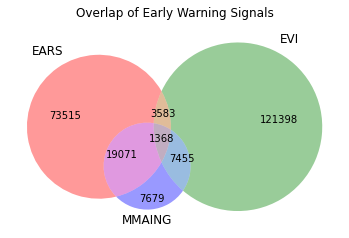

In [29]:
dta_plot = data[['sinal_ears_ivas','sinal_evi_ivas','sinal_mmaing_ivas']].copy()
# Convert to boolean sets
ears = set(dta_plot.index[data["sinal_ears_ivas"] == 1])
evi = set(dta_plot.index[data["sinal_evi_ivas"] == 1])
mmaing = set(dta_plot.index[data["sinal_mmaing_ivas"] == 1])

# Plot Venn
plt.figure(figsize=(6,6))
venn3([ears, evi, mmaing],
      set_labels=("EARS", "EVI", "MMAING"))
plt.title("Overlap of Early Warning Signals")
plt.show()


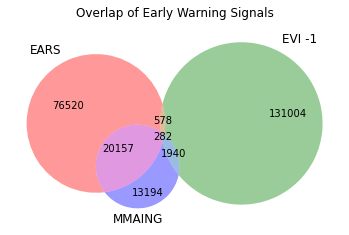

In [30]:
dta_plot = data[['sinal_ears_ivas','sinal_evi_ivas','sinal_mmaing_ivas']].copy()
# Convert to boolean sets
ears = set(dta_plot.index[data["sinal_ears_ivas"] == 1])
evi = set(dta_plot.index[data["sinal_evi_ivas"].shift(-1) == 1])
mmaing = set(dta_plot.index[data["sinal_mmaing_ivas"] == 1])

# Plot Venn
plt.figure(figsize=(6,6))
venn3([ears, evi, mmaing],
      set_labels=("EARS", "EVI -1", "MMAING"))
plt.title("Overlap of Early Warning Signals")
plt.show()


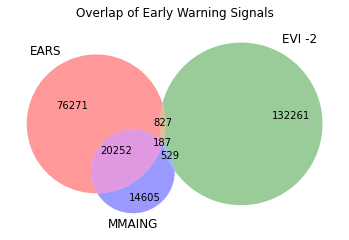

In [31]:
dta_plot = data[['sinal_ears_ivas','sinal_evi_ivas','sinal_mmaing_ivas']].copy()
# Convert to boolean sets
ears = set(dta_plot.index[data["sinal_ears_ivas"] == 1])
evi = set(dta_plot.index[data["sinal_evi_ivas"].shift(-2) == 1])
mmaing = set(dta_plot.index[data["sinal_mmaing_ivas"] == 1])

# Plot Venn
plt.figure(figsize=(6,6))
venn3([ears, evi, mmaing],
      set_labels=("EARS", "EVI -2", "MMAING"))
plt.title("Overlap of Early Warning Signals")
plt.show()

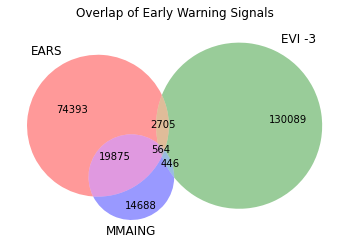

In [32]:
dta_plot = data[['sinal_ears_ivas','sinal_evi_ivas','sinal_mmaing_ivas']].copy()
# Convert to boolean sets
ears = set(dta_plot.index[data["sinal_ears_ivas"] == 1])
evi = set(dta_plot.index[data["sinal_evi_ivas"].shift(-3) == 1])
mmaing = set(dta_plot.index[data["sinal_mmaing_ivas"] == 1])

# Plot Venn
plt.figure(figsize=(6,6))
venn3([ears, evi, mmaing],
      set_labels=("EARS", "EVI -3", "MMAING"))
plt.title("Overlap of Early Warning Signals")
plt.show()

# Visualise 

In [33]:
df[df.nm_municipio == 'São Paulo']

,co_ibge,epiyear,epiweek,atend_totais,atend_ivas,atend_arbov,atend_diarreicas,atend_0a11,year_week,epidemi_cal_start,...,sinal_mmaing_consec_arbov_012,sinal_ens_consec_ivas_012,sinal_ens_consec_arbov_012,sinal_otc_consec_ivas_012,sinal_aesop_consec_ivas_012,mem_surge,mem_surge_01,mem_surge_01_without_isolated,mem_surge_01_corect_with_consec,warning_final_mem_surge_01
1742195,355030,2017,1,356,1,0,0,15,2017-01,2017-01-01,...,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0
1742196,355030,2017,2,245,0,0,0,1,2017-02,2017-01-08,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1742197,355030,2017,3,165,0,0,0,0,2017-03,2017-01-15,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1742198,355030,2017,4,133,0,0,0,1,2017-04,2017-01-22,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1742199,355030,2017,5,190,2,0,0,12,2017-05,2017-01-29,...,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742645,355030,2025,34,210,0,0,0,2,2025-34,2025-08-17,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1742646,355030,2025,35,206,0,0,0,2,2025-35,2025-08-24,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1742647,355030,2025,36,214,0,0,0,1,2025-36,2025-08-31,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1742648,355030,2025,37,209,0,0,0,4,2025-37,2025-09-07,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


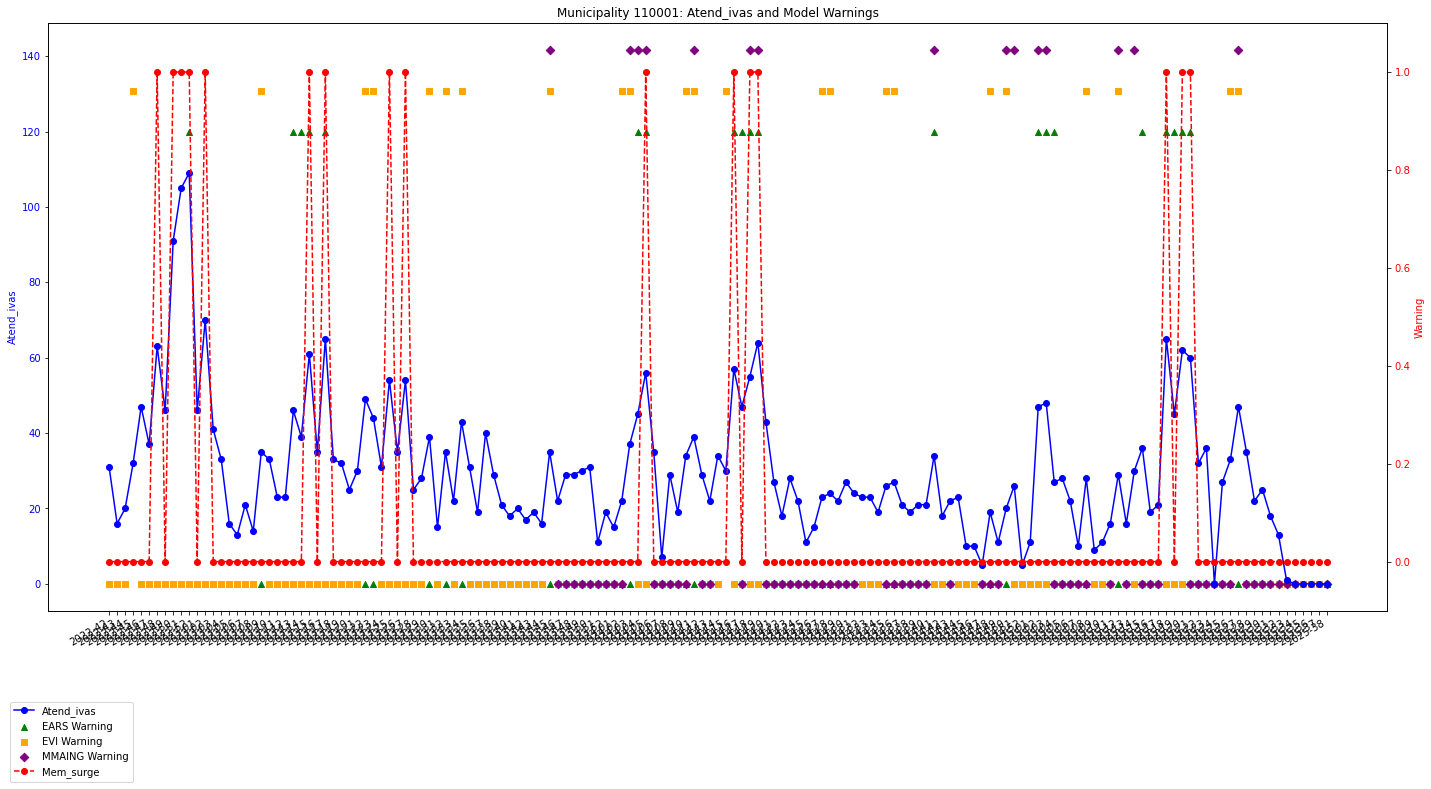

In [67]:
# --- Plot for one municipality ---
muni = code
plotdf = data[data["co_ibge"] == muni]

fig, ax1 = plt.subplots(figsize=(24,12))

# atend_ivas line
ax1.plot(plotdf["year_week"], plotdf["atend_ivas"], marker="o", label="Atend_ivas", color="blue")
ax1.set_ylabel("Atend_ivas", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# Add markers for individual model warnings
ax1.scatter(plotdf["year_week"], 
            plotdf["sinal_ears_ivas"] * plotdf["atend_ivas"].max()*1.1, 
            marker="^", color="green", label="EARS Warning")

ax1.scatter(plotdf["year_week"], 
            plotdf["sinal_evi_ivas"] * plotdf["atend_ivas"].max()*1.2, 
            marker="s", color="orange", label="EVI Warning")

ax1.scatter(plotdf["year_week"], 
            plotdf["sinal_mmaing_ivas"] * plotdf["atend_ivas"].max()*1.3, 
            marker="D", color="purple", label="MMAING Warning")

# Add secondary axis for consecutive warnings
ax2 = ax1.twinx()
ax2.plot(plotdf["year_week"], plotdf["mem_surge_01"], #mem_surge_01 warning_final_mem_surge_01, 
         marker="o", color="red", linestyle="--", label="Mem_surge")
ax2.set_ylabel("Warning", color="red")
ax2.tick_params(axis='y', labelcolor="red")
ax2.set_ylim(-0.1, 1.1)

# Legends
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.10))
plt.title(f"Municipality {muni}: Atend_ivas and Model Warnings")
fig.autofmt_xdate()
plt.show()


# Count lagged compartisons

In [35]:
def antici_count(data_res, col_warn_s1, col_warn_s2, col_code):
    """
    Function to compute anticipated counts of warnings and missed warnings 
    across different lead times per unique region.
    
    Parameters:
    data_res (pd.DataFrame): Input DataFrame.
    col_warn_s1 (str): Column name for the primary warning signal (e.g., PHC warnings).
    col_warn_s2 (str): Column name for the secondary warning signal (e.g., AIH warnings).
    col_code (str): Column name identifying the region.

    Returns:
    pd.DataFrame: Summary DataFrame with counts of early, concurrent, and missed warnings.
    """
    
    lst_count = []

    for code in data_res[col_code].unique():
    
        dta = data_res[data_res[col_code] == code].copy().reset_index()  # Use only data for the current region

        # Find sets based on PHC warnings (col_warn_s1) and AIH warnings (col_warn_s2) at different lags
        set3 = dta[(dta[col_warn_s1] == 1) & (dta[col_warn_s2].shift(-3) == 1)].index + 3
        set2 = dta[(dta[col_warn_s1] == 1) & (dta[col_warn_s2].shift(-3) == 0) & (dta[col_warn_s2].shift(-2) == 1)].index + 2
        set1 = dta[(dta[col_warn_s1] == 1) & 
                   (dta[col_warn_s2].shift(-3) == 0) & 
                   (dta[col_warn_s2].shift(-2) == 0) & 
                   (dta[col_warn_s2].shift(-1) == 1)].index + 1
        set0 = dta[(dta[col_warn_s1] == 1) & 
                   (dta[col_warn_s2] == 1) & 
                   (dta[col_warn_s2].shift(-3) == 0) & 
                   (dta[col_warn_s2].shift(-2) == 0) & 
                   (dta[col_warn_s2].shift(-1) == 0)].index
        
        # Identify True Negatives (TN)
        set_tn1 = dta[(dta[col_warn_s2] == 0) &  # AIH warning is 0
                      (dta[col_warn_s1] == 0) & 
                      (dta[col_warn_s1].shift(1).fillna(0) == 0) & 
                      (dta[col_warn_s1].shift(2).fillna(0) == 0) & 
                      (dta[col_warn_s1].shift(3).fillna(0) == 0)
                    ].index
        
        set_fp1 = dta[(dta[col_warn_s2] == 0) & 
                   ((dta[col_warn_s1] == 1) | 
                   (dta[col_warn_s1].shift(3).fillna(0) == 1) | 
                   (dta[col_warn_s1].shift(2).fillna(0) == 1) | 
                   (dta[col_warn_s1].shift(1).fillna(0) == 1))].index

        # Warnings in PHC right after an AIH warning (possibly not anticipated but concurrent)
        set1_after = dta[(dta[col_warn_s1].shift(-1) == 1) & (dta[col_warn_s2] == 1)].index
        
       

        # Compute counts of warnings at different lead times
        n3 = len(set3)
        n2 = len(set(set2) - set(set3))
        n1 = len((set(set1) - set(set3)) - set(set2))
        n0 = len(((set(set0) - set(set3)) - set(set2)) - set(set1))
        n1_after = len((((set(set1_after) - set(set3)) - set(set2)) - set(set1)) - set(set0))
        n_tn1 = len(set_tn1) 
        n_fp1 = len(set_fp1)

        # Drop all anticipated and concurrent warnings to count missed ones
        ind_drop = set(set3) | set(set2) | set(set1) | set(set0) #| set(set1_after)
        missed = dta.drop(index=ind_drop)[col_warn_s2].sum()
        
        TP = n3 + n2 + n1 + n0
        
        # outra forma de calcular o FN
        #set_FN = dta[(dta[col_warn_s2] == 1) &  
        #           (dta[col_warn_s1] == 0) & 
        #           (dta[col_warn_s1].shift(3).fillna(0) == 0) & 
        #           (dta[col_warn_s1].shift(2).fillna(0) == 0) & 
        #           (dta[col_warn_s1].shift(1).fillna(0) == 0)].index
        
        
        # Create the results dictionary for this region
        data = {
            col_code: [code],
            'n3': [n3],
            'n2': [n2],
            'n1': [n1],
            'n0': [n0],
            'n1_after': [n1_after],
            'missed': [missed],
            'TP': [TP],
            'TN1': [n_tn1], # True Negative
            'FP1': [n_fp1], # False Positive
            'FN': missed,
            'total_aih_warning': [dta[col_warn_s2].sum()]
        }

        # Append to results list
        data_output = pd.DataFrame(data)
        lst_count.append(data_output)

    # Combine all results into a single DataFrame
    df_warning_count = pd.concat(lst_count, ignore_index=True)
    
    return df_warning_count


In [36]:
def summarize_performance(df_warning_count):
    """
    Summarizes performance metrics including Sensitivity, Specificity, PPV, F1-score, POD, and FPR.
    
    Parameters:
    df_warning_count (pd.DataFrame): Dataframe containing warning counts and classification metrics.
    
    Returns:
    pd.DataFrame: Summary table with performance metrics.
    """
    # Total AIH Warnings
    total_warnings = df_warning_count.total_aih_warning.sum()
    
    # Early Detection (1 to 3 weeks)
    early_count = df_warning_count.n3.sum() + df_warning_count.n2.sum() + df_warning_count.n1.sum()
    early_rate = round((early_count * 100) / total_warnings, 1)
    
    # Timely Detection (0 week)
    timely_count = df_warning_count.n0.sum()
    timely_rate = round((timely_count * 100) / total_warnings, 1)
    
    # Missed Warnings
    missed_count = df_warning_count.missed.sum()
    missed_rate = round((missed_count * 100) / total_warnings, 1)
    
    # Classification Metrics
    TP = df_warning_count.TP.sum()
    FN = df_warning_count.FN.sum()
    TN = df_warning_count.TN1.sum()
    FP = df_warning_count.FP1.sum()

    
    # Sensitivity (Recall)
    Sensitivity = round((TP / (TP + FN)) * 100, 1) if (TP + FN) > 0 else 0
    
    # Specificity
    Specificity = round((TN / (TN + FP)) * 100, 1) if (TN + FP) > 0 else 0
    
    # Positive Predictive Value (PPV)
    PPV = round((TP / (TP + FP)) * 100, 1) if (TP + FP) > 0 else 0
    
    # F1-score
    F1_score = round(2 * (TP / (TP + FN)) * (TP / (TP + FP)) / ((TP / (TP + FN)) + (TP / (TP + FP))), 2) if ((TP / (TP + FN)) + (TP / (TP + FP))) > 0 else 0
    
    Precision = round(((TP + TN) / (TP + TN + FP + FN) * 100), 1) if (TP + TN + FP + FN) > 0 else 0

    # Probability of Detection (POD)
    POD = round(((early_count + timely_count + df_warning_count.n1_after.sum()) / total_warnings) * 100, 1)
    
    # False Positive Rate (FPR)
    FPR = round((FP / (FP + TN)) * 100, 1) if (FP + TN) > 0 else 0
    
    # Create summary DataFrame
    summary_df = pd.DataFrame({
        "Metric": ["Total Warnings", "Early Detection (1-3 weeks)", "Timely Detection (0 weeks)", "Missed Warnings",
                   "Sensitivity ", "Specificity", "PPV",  "POD", "FPR","Precision (%)"],
        "Value": [total_warnings, f"{early_count} ({early_rate}%)", f"{timely_count} ({timely_rate}%)", f"{missed_count} ({missed_rate}%)",
                   f"{Sensitivity}%", f"{Specificity}%", f"{PPV}%", f"{POD}%", f"{FPR}%", f"{Precision}%"]
    })
    
    return summary_df



## EARS --> MEM_surges

In [37]:
df_warning_count = antici_count(data, 'sinal_ears_ivas', 'warning_final_mem_surge_01', 'co_ibge') #mem_surge_01

In [38]:
df_warning_count.columns

Index(['co_ibge', 'n3', 'n2', 'n1', 'n0', 'n1_after', 'missed', 'TP', 'TN1',
       'FP1', 'FN', 'total_aih_warning'],
      dtype='object')

In [39]:
performance_summary = summarize_performance(df_warning_count)

In [40]:
performance_summary

,Metric,Value
0,Total Warnings,18459
1,Early Detection (1-3 weeks),5604 (30.4%)
2,Timely Detection (0 weeks),4959 (26.9%)
3,Missed Warnings,7896 (42.8%)
4,Sensitivity,57.2%
5,Specificity,67.6%
6,PPV,4.7%
7,POD,64.7%
8,FPR,32.4%
9,Precision (%),67.4%


In [41]:
table_ears_mem = df_warning_count.copy()


lst = ['n3', 'n2', 'n1', 'n0', 'n1_after', 'missed', 'TP', 'TN1', 'FP1', 'FN']

table_ears_mem = table_ears_mem.rename(columns={col: f"{col}_ears_mem" for col in lst
                             })


table_ears_mem = table_ears_mem.rename(columns={'total_aih_warning': 'total_mem_warning'})

In [42]:
table_ears_mem

,co_ibge,n3_ears_mem,n2_ears_mem,n1_ears_mem,n0_ears_mem,n1_after_ears_mem,missed_ears_mem,TP_ears_mem,TN1_ears_mem,FP1_ears_mem,FN_ears_mem,total_mem_warning
0,110001,1,1,0,1,0,2,3,96,41,2,5
1,110002,0,1,0,2,0,1,3,86,37,1,4
2,110003,0,0,1,2,0,2,3,81,34,2,5
3,110004,2,0,0,1,0,1,3,102,34,1,4
4,110005,1,0,0,1,0,3,2,69,38,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...
5558,522200,1,0,0,2,0,1,3,93,42,1,4
5559,522205,0,0,0,0,0,0,0,96,39,0,0
5560,522220,0,0,0,1,1,2,1,64,47,2,3
5561,522230,0,0,1,3,0,0,4,77,54,0,4


## EVI --> MEM_surges

In [43]:
df_warning_count = antici_count(data, 'sinal_evi_ivas', 'warning_final_mem_surge_01', 'co_ibge')

In [44]:
df_warning_count.columns

Index(['co_ibge', 'n3', 'n2', 'n1', 'n0', 'n1_after', 'missed', 'TP', 'TN1',
       'FP1', 'FN', 'total_aih_warning'],
      dtype='object')

In [45]:
performance_summary = summarize_performance(df_warning_count)

In [46]:
performance_summary

,Metric,Value
0,Total Warnings,18459
1,Early Detection (1-3 weeks),6849 (37.1%)
2,Timely Detection (0 weeks),2986 (16.2%)
3,Missed Warnings,8624 (46.7%)
4,Sensitivity,53.3%
5,Specificity,53.4%
6,PPV,2.5%
7,POD,55.4%
8,FPR,46.6%
9,Precision (%),53.4%


In [47]:
table_evi_mem = df_warning_count.copy()


lst = ['n3', 'n2', 'n1', 'n0', 'n1_after', 'missed', 'TP', 'TN1', 'FP1', 'FN']

table_evi_mem = table_evi_mem.rename(columns={col: f"{col}_evi_mem" for col in lst
                             })


table_evi_mem = table_evi_mem.rename(columns={'total_aih_warning': 'total_mem_warning'})

In [48]:
table_evi_mem

,co_ibge,n3_evi_mem,n2_evi_mem,n1_evi_mem,n0_evi_mem,n1_after_evi_mem,missed_evi_mem,TP_evi_mem,TN1_evi_mem,FP1_evi_mem,FN_evi_mem,total_mem_warning
0,110001,2,0,1,0,0,2,3,82,65,2,5
1,110002,1,1,1,0,0,1,3,94,54,1,4
2,110003,0,1,0,1,0,3,2,86,61,3,5
3,110004,1,0,0,1,0,2,2,77,71,2,4
4,110005,0,0,1,1,0,3,2,95,52,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...
5558,522200,1,1,0,0,1,2,2,74,74,2,4
5559,522205,0,0,0,0,0,0,0,67,85,0,0
5560,522220,1,0,1,0,0,1,2,90,59,1,3
5561,522230,1,0,0,0,0,3,1,68,80,3,4


## MMAING --> MEM_surges

In [49]:
df_warning_count = antici_count(data, 'sinal_mmaing_ivas', 'warning_final_mem_surge_01', 'co_ibge')

In [50]:
df_warning_count.columns

Index(['co_ibge', 'n3', 'n2', 'n1', 'n0', 'n1_after', 'missed', 'TP', 'TN1',
       'FP1', 'FN', 'total_aih_warning'],
      dtype='object')

In [51]:
performance_summary = summarize_performance(df_warning_count)

In [52]:
performance_summary

,Metric,Value
0,Total Warnings,18459
1,Early Detection (1-3 weeks),2235 (12.1%)
2,Timely Detection (0 weeks),2515 (13.6%)
3,Missed Warnings,13709 (74.3%)
4,Sensitivity,25.7%
5,Specificity,66.8%
6,PPV,4.4%
7,POD,30.5%
8,FPR,33.2%
9,Precision (%),64.5%


In [53]:
table_mmaing_mem = df_warning_count.copy()


lst = ['n3', 'n2', 'n1', 'n0', 'n1_after', 'missed', 'TP', 'TN1', 'FP1', 'FN']

table_mmaing_mem = table_mmaing_mem.rename(columns={col: f"{col}_mmaing_mem" for col in lst
                             })


table_mmaing_mem = table_mmaing_mem.rename(columns={'total_aih_warning': 'total_mem_warning'})

In [54]:
table_mmaing_mem

,co_ibge,n3_mmaing_mem,n2_mmaing_mem,n1_mmaing_mem,n0_mmaing_mem,n1_after_mmaing_mem,missed_mmaing_mem,TP_mmaing_mem,TN1_mmaing_mem,FP1_mmaing_mem,FN_mmaing_mem,total_mem_warning
0,110001,0,0,0,0,0,5,0,41,42,5,5
1,110002,0,0,0,0,0,4,0,24,0,4,4
2,110003,0,1,0,1,0,3,2,39,44,3,5
3,110004,0,0,0,1,1,3,1,42,31,3,4
4,110005,0,0,0,0,0,5,0,6,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
5558,522200,0,0,1,0,0,3,1,36,44,3,4
5559,522205,0,0,0,0,0,0,0,38,35,0,0
5560,522220,0,0,0,2,0,1,2,65,13,1,3
5561,522230,0,0,0,0,0,4,0,38,4,4,4


# Study an ensamble definition

In [5]:
code = 110001

set_muni = data[data.co_ibge == code]

In [6]:
set_muni.columns

Index(['co_ibge', 'nm_municipio', 'epiyear', 'year_week', 'atend_ivas',
       'Aviso AESOP', 'sinal_ens_ivas', 'mem_surge', 'mem_surge_01',
       'sinal_evi_ivas', 'sinal_ears_ivas', 'sinal_mmaing_ivas',
       'mem_surge_01_without_isolated', 'mem_surge_01_corect_with_consec',
       'warning_final_mem_surge_01'],
      dtype='object')

In [7]:
set_muni = set_muni.assign( sinal_evi_ivas_lag_1 = set_muni['sinal_evi_ivas'].shift(1).fillna(0).astype(int),
                            sinal_evi_ivas_lag_2 = set_muni['sinal_evi_ivas'].shift(2).fillna(0).astype(int),
                            sinal_evi_ivas_lag_3 = set_muni['sinal_evi_ivas'].shift(3).fillna(0).astype(int),
                            sinal_ears_ivas_lag_1 = set_muni['sinal_ears_ivas'].shift(1).fillna(0).astype(int),
                            sinal_ears_ivas_lag_2 = set_muni['sinal_ears_ivas'].shift(2).fillna(0).astype(int),
                            sinal_ears_ivas_lag_3 = set_muni['sinal_ears_ivas'].shift(3).fillna(0).astype(int),
                            sinal_mmaing_ivas_lag_1 = set_muni['sinal_mmaing_ivas'].shift(1).fillna(0).astype(int),
                            sinal_mmaing_ivas_lag_2 = set_muni['sinal_mmaing_ivas'].shift(2).fillna(0).astype(int),
                            sinal_mmaing_ivas_lag_3 = set_muni['sinal_mmaing_ivas'].shift(3).fillna(0).astype(int),
                            mem_surge_01_lag_1 = set_muni['warning_final_mem_surge_01'].shift(-1).fillna(0).astype(int),
                            mem_surge_01_lag_2 = set_muni['warning_final_mem_surge_01'].shift(-2).fillna(0).astype(int),
                            mem_surge_01_lag_3 = set_muni['warning_final_mem_surge_01'].shift(-3).fillna(0).astype(int),
                            )

In [8]:
set_muni.columns

Index(['co_ibge', 'nm_municipio', 'epiyear', 'year_week', 'atend_ivas',
       'Aviso AESOP', 'sinal_ens_ivas', 'mem_surge', 'mem_surge_01',
       'sinal_evi_ivas', 'sinal_ears_ivas', 'sinal_mmaing_ivas',
       'mem_surge_01_without_isolated', 'mem_surge_01_corect_with_consec',
       'warning_final_mem_surge_01', 'sinal_evi_ivas_lag_1',
       'sinal_evi_ivas_lag_2', 'sinal_evi_ivas_lag_3', 'sinal_ears_ivas_lag_1',
       'sinal_ears_ivas_lag_2', 'sinal_ears_ivas_lag_3',
       'sinal_mmaing_ivas_lag_1', 'sinal_mmaing_ivas_lag_2',
       'sinal_mmaing_ivas_lag_3', 'mem_surge_01_lag_1', 'mem_surge_01_lag_2',
       'mem_surge_01_lag_3'],
      dtype='object')

In [9]:
# --- Function to detect consecutive warnings in 4-week window ---
def detect_consecutive_events(subdf):
    subdf = subdf.sort_values("year_week").reset_index(drop=True)
    
    warnings = (subdf[["sinal_ears_ivas","sinal_evi_ivas","sinal_mmaing_ivas"]]
                .sum(axis=1))  # total warnings per week
    
    event_flags = []
    for i in range(len(warnings)):
        # look back 3 weeks (window of 4)
        window = warnings[max(0,i-3):i+1]
        # if at least 2+ models triggered in that window, flag it
        if (subdf.loc[max(0,i-3):i, ["sinal_ears_ivas","sinal_evi_ivas","sinal_mmaing_ivas"]].sum().gt(0).sum() >= 2):
            event_flags.append(1)
        else:
            event_flags.append(0)
    
    subdf["consecutive_event"] = event_flags
    return subdf

In [10]:
# --- Apply per municipality ---
set_muni = set_muni.groupby("co_ibge").apply(detect_consecutive_events).reset_index(drop=True)

# using the three models without lag

In [11]:
# Split dataset
X = set_muni[['sinal_evi_ivas', 'sinal_ears_ivas',
       'sinal_mmaing_ivas']].fillna(0) 

y = set_muni['mem_surge_01']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50)

# Fit model
clf = LogisticRegression(class_weight="balanced")
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.91      0.93        55
           1       0.50      0.71      0.59         7

    accuracy                           0.89        62
   macro avg       0.73      0.81      0.76        62
weighted avg       0.91      0.89      0.90        62



In [13]:
# To get risk probabilities
risk_probs = clf.predict_proba(X_test)[:, 1]

In [15]:
len(clf.predict_proba(X)[:, 1])

153

In [16]:
set_muni = set_muni.assign(risk_probs = clf.predict_proba(X)[:, 1])

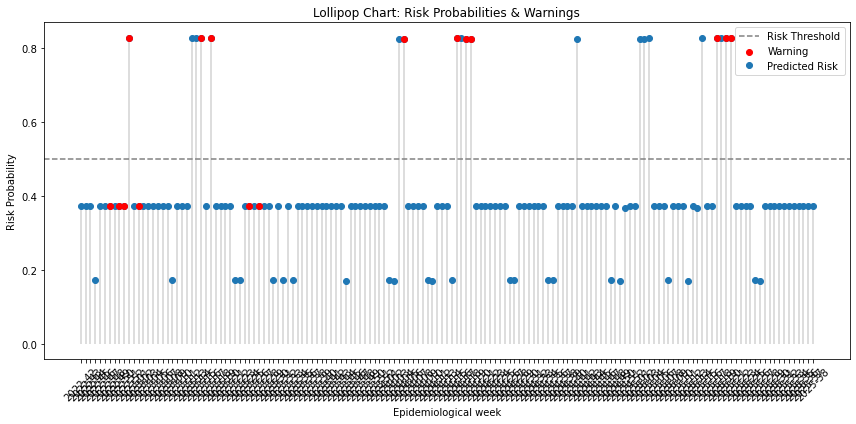

In [17]:
plt.figure(figsize=(12, 6))
plt.stem(set_muni['year_week'], set_muni['risk_probs'],
         basefmt=" ", linefmt='lightgray', markerfmt='o', label='Predicted Risk')

plt.scatter(set_muni.loc[set_muni['mem_surge_01'] == 1, 'year_week'],
            set_muni.loc[set_muni['mem_surge_01'] == 1, 'risk_probs'],
            color='red', label='Warning', zorder=3)

plt.axhline(0.5, color='gray', linestyle='--', label='Risk Threshold')
plt.xticks(rotation=45)
plt.title('Lollipop Chart: Risk Probabilities & Warnings')
plt.xlabel('Epidemiological week')
plt.ylabel('Risk Probability')
plt.legend()
plt.tight_layout()
plt.grid(False)
plt.show()


# all with lag

In [18]:
# Split dataset
X = set_muni[['sinal_evi_ivas', 'sinal_evi_ivas_lag_1', 'sinal_evi_ivas_lag_2', 'sinal_evi_ivas_lag_3',
              'sinal_ears_ivas', 'sinal_ears_ivas_lag_1', 'sinal_ears_ivas_lag_2', 'sinal_ears_ivas_lag_3',
              'sinal_mmaing_ivas', 'sinal_mmaing_ivas_lag_1', 'sinal_mmaing_ivas_lag_2', 'sinal_mmaing_ivas_lag_3']].fillna(0) 

y = set_muni['mem_surge_01']#'mem_surge_01_corect_with_consec']#

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50)

# Fit model
clf = LogisticRegression(class_weight="balanced")
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.87      0.91        55
           1       0.42      0.71      0.53         7

    accuracy                           0.85        62
   macro avg       0.69      0.79      0.72        62
weighted avg       0.90      0.85      0.87        62



In [19]:
# To get risk probabilities
risk_probs = clf.predict_proba(X_test)[:, 1]

In [20]:
set_muni = set_muni.assign(risk_probs = clf.predict_proba(X)[:, 1])

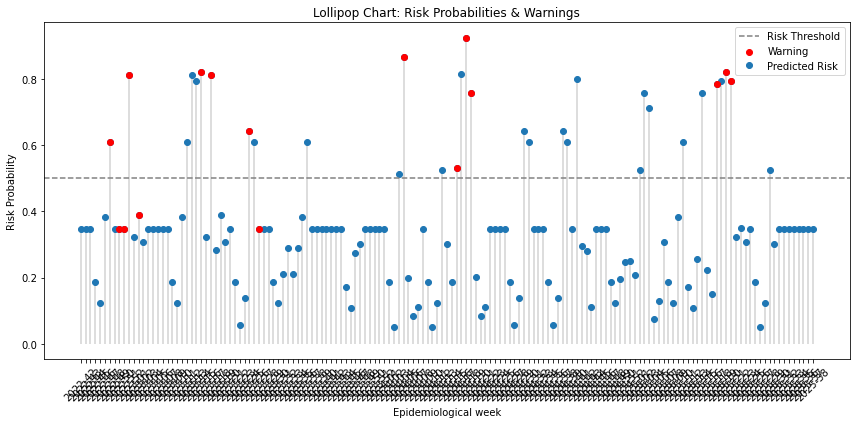

In [21]:
plt.figure(figsize=(12, 6))
plt.stem(set_muni['year_week'], set_muni['risk_probs'],
         basefmt=" ", linefmt='lightgray', markerfmt='o', label='Predicted Risk')

plt.scatter(set_muni.loc[set_muni['mem_surge_01'] == 1, 'year_week'],
            set_muni.loc[set_muni['mem_surge_01'] == 1, 'risk_probs'],
            color='red', label='Warning', zorder=3)

plt.axhline(0.5, color='gray', linestyle='--', label='Risk Threshold')
plt.xticks(rotation=45)
plt.title('Lollipop Chart: Risk Probabilities & Warnings')
plt.xlabel('Epidemiological week')
plt.ylabel('Risk Probability')
plt.legend()
plt.tight_layout()
plt.grid(False)
plt.show()


# weighted

In [74]:
# Split dataset
X = set_muni[['sinal_evi_ivas', 'sinal_ears_ivas',
       'sinal_evi_ivas_lag_1', 'sinal_evi_ivas_lag_2', 
       'sinal_ears_ivas_lag_3', 'sinal_mmaing_ivas_lag_1',
        'sinal_mmaing_ivas_lag_3']].fillna(0) 

y = set_muni['mem_surge_01']#'mem_surge_01_corect_with_consec']#

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50)

# Fit model
clf = LogisticRegression(class_weight="balanced")
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.91      0.94        46
           1       0.33      0.67      0.44         3

    accuracy                           0.90        49
   macro avg       0.66      0.79      0.69        49
weighted avg       0.94      0.90      0.91        49



In [75]:
# To get risk probabilities
risk_probs = clf.predict_proba(X_test)[:, 1]

In [76]:
set_muni = set_muni.assign(risk_probs = clf.predict_proba(X)[:, 1])

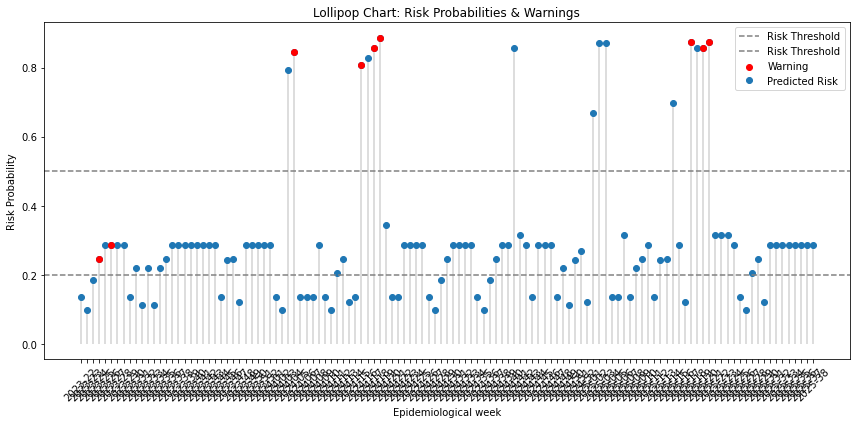

In [77]:
plt.figure(figsize=(12, 6))
plt.stem(set_muni['year_week'], set_muni['risk_probs'],
         basefmt=" ", linefmt='lightgray', markerfmt='o', label='Predicted Risk')

plt.scatter(set_muni.loc[set_muni['mem_surge_01'] == 1, 'year_week'],
            set_muni.loc[set_muni['mem_surge_01'] == 1, 'risk_probs'],
            color='red', label='Warning', zorder=3)

plt.axhline(0.5, color='gray', linestyle='--', label='Risk Threshold')
plt.axhline(0.2, color='gray', linestyle='--', label='Risk Threshold')
plt.xticks(rotation=45)
plt.title('Lollipop Chart: Risk Probabilities & Warnings')
plt.xlabel('Epidemiological week')
plt.ylabel('Risk Probability')
plt.legend()
plt.tight_layout()
plt.grid(False)
plt.show()


In [78]:
set_muni.columns

Index(['co_ibge', 'nm_municipio', 'epiyear', 'year_week', 'atend_ivas',
       'Aviso AESOP', 'sinal_ens_ivas', 'mem_surge', 'mem_surge_01',
       'sinal_evi_ivas', 'sinal_ears_ivas', 'sinal_mmaing_ivas',
       'mem_surge_01_without_isolated', 'mem_surge_01_corect_with_consec',
       'warning_final_mem_surge_01', 'sinal_evi_ivas_lag_1',
       'sinal_evi_ivas_lag_2', 'sinal_evi_ivas_lag_3', 'sinal_ears_ivas_lag_1',
       'sinal_ears_ivas_lag_2', 'sinal_ears_ivas_lag_3',
       'sinal_mmaing_ivas_lag_1', 'sinal_mmaing_ivas_lag_2',
       'sinal_mmaing_ivas_lag_3', 'mem_surge_01_lag_1', 'mem_surge_01_lag_2',
       'mem_surge_01_lag_3', 'consecutive_event', 'risk_probs'],
      dtype='object')

## Create new aesop warning based on risk analysis

In [22]:
set_muni = set_muni.assign(aviso_aesop = (set_muni["risk_probs"] > 0.5).astype(int))


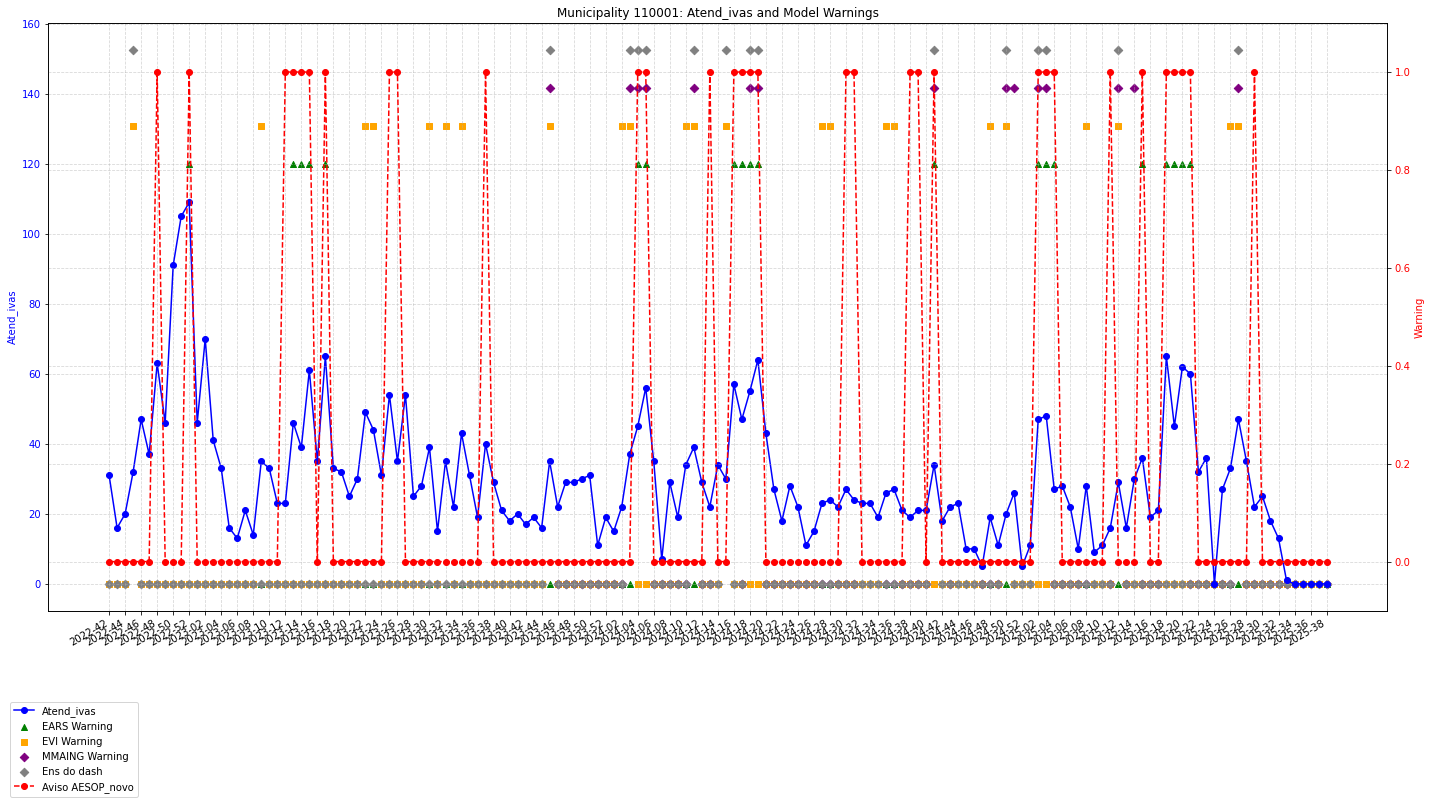

In [24]:
# --- Plot for one municipality ---
muni = code
plotdf = set_muni#data[data["co_ibge"] == muni]

fig, ax1 = plt.subplots(figsize=(24,12))

# atend_ivas line
ax1.plot(plotdf["year_week"], plotdf["atend_ivas"], marker="o", label="Atend_ivas", color="blue")
ax1.set_ylabel("Atend_ivas", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# x-axis ticks (reduce clutter)
ax1.set_xticks(plotdf["year_week"][::2])  # every 2 weeks
ax1.set_xticklabels(plotdf["year_week"][::2], rotation=90)

# grid
ax1.grid(True, linestyle="--", alpha=0.5)

# Add markers for individual model warnings
ax1.scatter(plotdf["year_week"], 
            plotdf["sinal_ears_ivas"] * plotdf["atend_ivas"].max()*1.1, 
            marker="^", color="green", label="EARS Warning")

ax1.scatter(plotdf["year_week"], 
            plotdf["sinal_evi_ivas"] * plotdf["atend_ivas"].max()*1.2, 
            marker="s", color="orange", label="EVI Warning")

ax1.scatter(plotdf["year_week"], 
            plotdf["sinal_mmaing_ivas"] * plotdf["atend_ivas"].max()*1.3, 
            marker="D", color="purple", label="MMAING Warning")

ax1.scatter(plotdf["year_week"], 
            plotdf["sinal_ens_ivas"] * plotdf["atend_ivas"].max()*1.4, 
            marker="D", color="grey", label="Ens do dash")

# x-axis ticks (reduce clutter)
ax1.set_xticks(plotdf["year_week"][::2])  # every 2 weeks
ax1.set_xticklabels(plotdf["year_week"][::2], rotation=90)

# grid
ax1.grid(True, linestyle="--", alpha=0.5)

# Add secondary axis for consecutive warnings
ax2 = ax1.twinx()
ax2.plot(plotdf["year_week"], plotdf["aviso_aesop"].astype(int), #mem_surge_01 warning_final_mem_surge_01
         marker="o", color="red", linestyle="--", label="Aviso AESOP_novo")
ax2.set_ylabel("Warning", color="red")
ax2.tick_params(axis='y', labelcolor="red")
ax2.set_ylim(-0.1, 1.1)

# x-axis ticks (reduce clutter)
ax2.set_xticks(plotdf["year_week"][::2])  # every 2 weeks
ax2.set_xticklabels(plotdf["year_week"][::2], rotation=90)

# grid
ax2.grid(True, linestyle="--", alpha=0.5)



# Legends
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.10))
plt.title(f"Municipality {muni}: Atend_ivas and Model Warnings")
fig.autofmt_xdate()
plt.show()
